# A1: Predictiong Car Price

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [3]:
df = pd.read_csv('../data/Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of your data
df.shape

(8128, 13)

In [6]:
# Statistical 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

#### Data Cleaning and Preprocessing

map First owner to 1, ..., Test Drive Car to 5

In [9]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [10]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

For the feature fuel, remove all rows with CNG and LPG

In [11]:
df = df[~df['fuel'].isin(['CNG','LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split

In [12]:
df['mileage'] = df['mileage'].str.split().str[0]
df['mileage'] = df['mileage'].astype(float)
df['mileage'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 23.59, 20.  , 19.01,
       17.3 , 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21, 15.37,
       11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 , 14.53,
       21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01, 22.37,
       19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96, 18.  ,
       12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56, 22.69,
       19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44, 13.  ,
       21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 17.6 , 28.4 ,
       14.1 , 25.17,

For the feature engine, remove “CC” and convert the column to numerical type (e.g., float). Do the same for max power

In [13]:
df['engine'] = df.engine.str.split().str[0].astype(float)

In [14]:
df['max_power'] = df.max_power.str.split().str[0].astype(float)

For the feature brand, take only the first word and remove the rest

In [15]:
df.rename(columns = {'name':'brand'},  inplace = True)
df['brand'] = df['brand'].str.split().str.get(0)
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [16]:
#Drop the feature torque,

df = df.drop(columns=['torque'])

In [17]:
#Delete 'Test Driver Car' sample
df = df[df['owner'] != 5]
df['owner'].unique()

array([1, 2, 3, 4])

In [18]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


## Univariate analysis

Distribution Plot

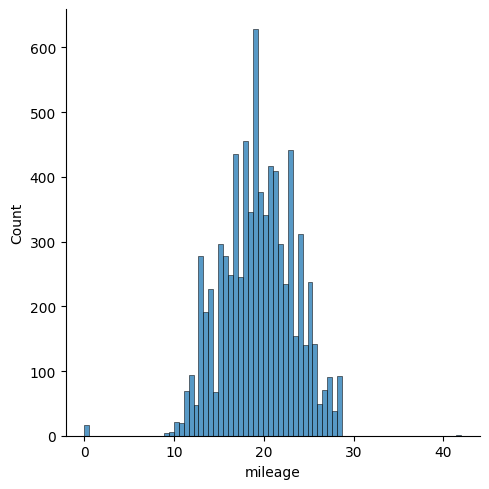

In [19]:
sns.displot(data = df, x = 'mileage')

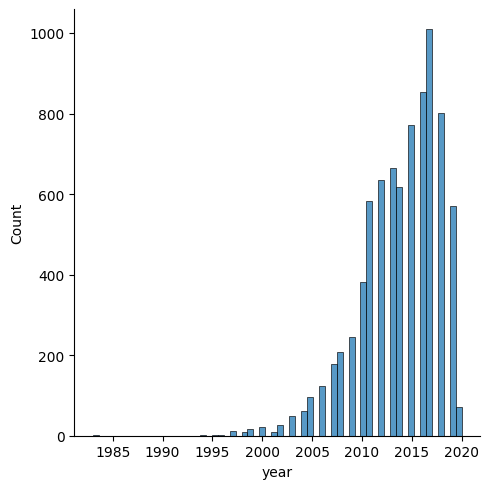

In [20]:
sns.displot(data = df, x = 'year')

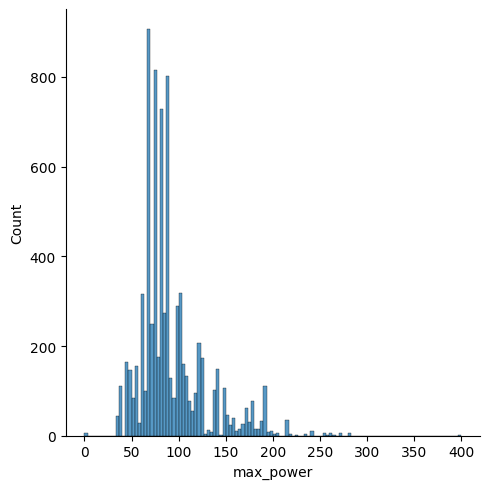

In [21]:
sns.displot(data = df, x = 'max_power')

### Correlation matrix
As the correlation matrix requires numerical values, I applied label encoding to the categorical features: ‘brand’, ‘fuel’, ‘transmission’, and ‘seller_type’.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [23]:
# To view the mapping
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'Ambassador': 0, 'Ashok': 1, 'Audi': 2, 'BMW': 3, 'Chevrolet': 4, 'Daewoo': 5, 'Datsun': 6, 'Fiat': 7, 'Force': 8, 'Ford': 9, 'Honda': 10, 'Hyundai': 11, 'Isuzu': 12, 'Jaguar': 13, 'Jeep': 14, 'Kia': 15, 'Land': 16, 'Lexus': 17, 'MG': 18, 'Mahindra': 19, 'Maruti': 20, 'Mercedes-Benz': 21, 'Mitsubishi': 22, 'Nissan': 23, 'Opel': 24, 'Peugeot': 25, 'Renault': 26, 'Skoda': 27, 'Tata': 28, 'Toyota': 29, 'Volkswagen': 30, 'Volvo': 31}


In [24]:
df['fuel'] = le.fit_transform(df['fuel'])

df['fuel'].unique()

array([0, 1])

In [25]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [26]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [27]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [28]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [29]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [30]:
# Apply log transformation to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

In [31]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 815.3 KB


<Axes: >

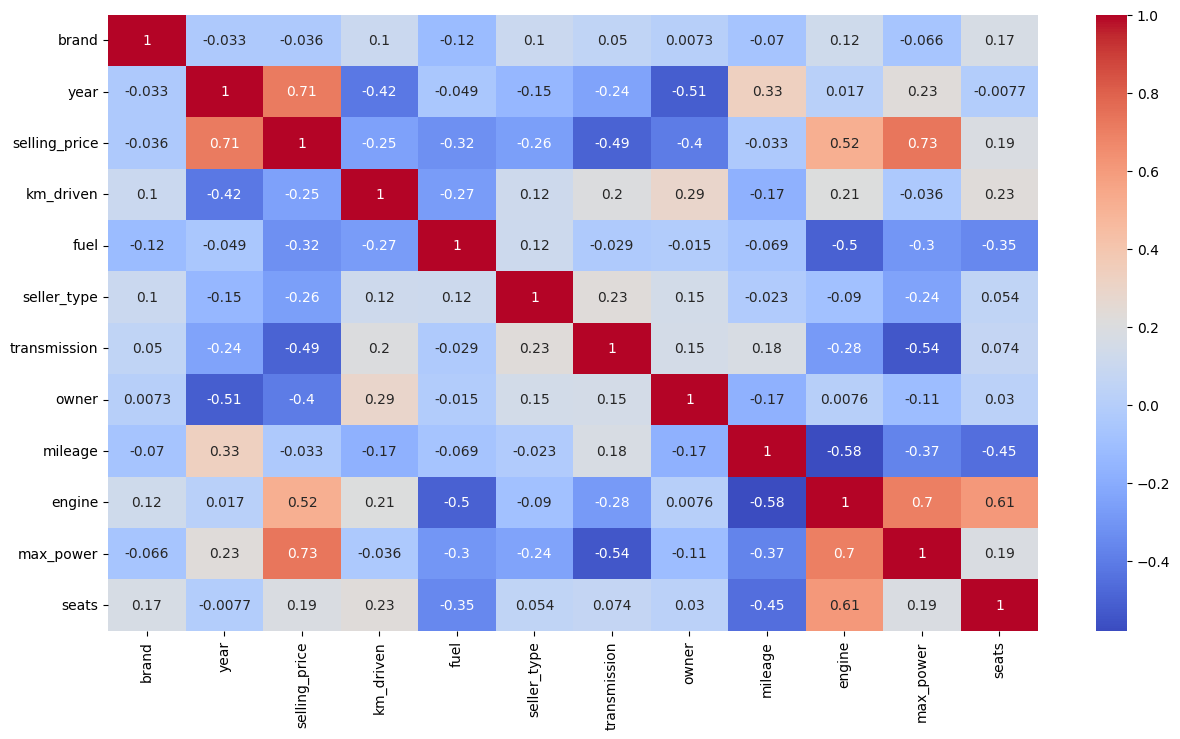

In [33]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## 3. Feature Engineering

We gonna skip.

## 4. Feature selection

In [34]:
#x is our strong features
X = df[['year', 'mileage','max_power']]
y = df['selling_price']

In [35]:
X.shape , y.shape

((8028, 3), (8028,))

### Train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [37]:
X_train.shape , X_test.shape

((6422, 3), (1606, 3))

In [38]:
y_train.shape , y_test.shape

((6422,), (1606,))

## 5. Preprocessing

### Null values

In [39]:
#check for null values
X_train[['max_power', 'mileage','year']].isna().sum()

max_power    165
mileage      171
year           0
dtype: int64

In [40]:
X_test[['max_power', 'mileage','year']].isna().sum()

max_power    43
mileage      43
year          0
dtype: int64

In [41]:
y_train.isna().sum()

np.int64(0)

In [42]:
y_test.isna().sum()

np.int64(0)

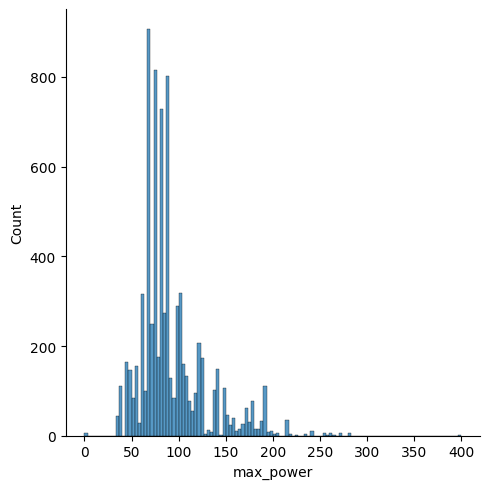

In [43]:
sns.displot(data=df, x='max_power')

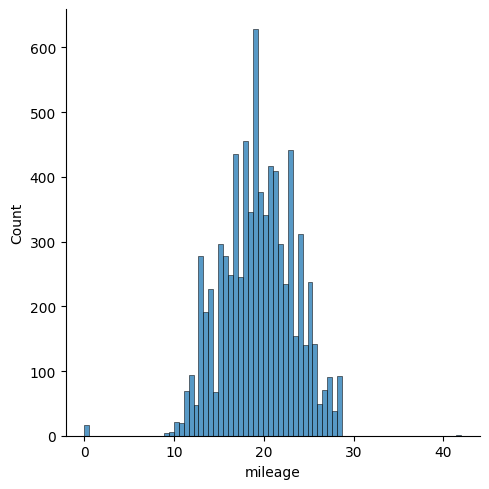

In [44]:
sns.displot(data=df, x='mileage')

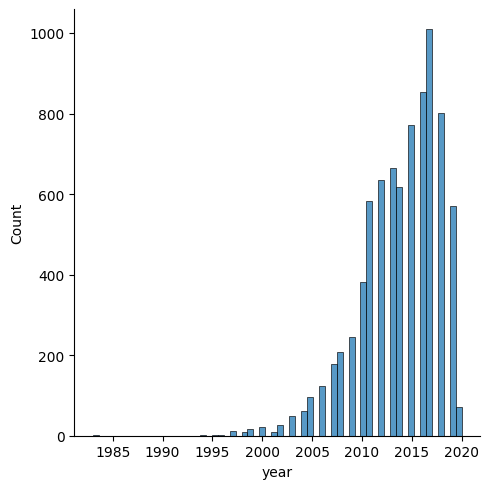

In [45]:
sns.displot(data=df, x='year')

In [46]:
#let's fill the training set first!

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)


In [47]:

X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [48]:
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].median()

In [49]:
#check again
X_train[['max_power', 'mileage','year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [50]:
X_test[['max_power', 'mileage','year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [51]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

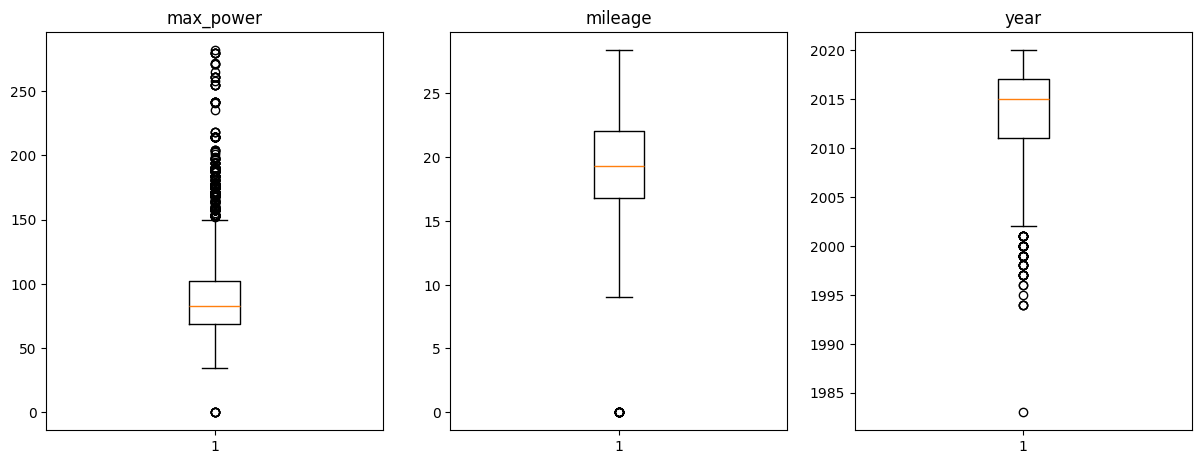

In [52]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2, 'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [53]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [54]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [56]:
X_test

array([[-0.69644617, -1.10420563, -0.04431607],
       [ 0.53920896,  0.07287391,  0.98536065],
       [ 0.29207793,  0.28459699, -0.6973928 ],
       ...,
       [-2.92062539, -0.82694921, -1.55185381],
       [ 0.29207793,  1.44151243,  0.20030326],
       [ 0.04494691,  0.25687135, -0.27755776]])

In [57]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 3)
Shape of X_test:  (1606, 3)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 6. Modeling

In [58]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10856602117991548
r2:  0.8475499065024804


### Much better: Cross validation + Grid search

In [59]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

In [60]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.11221852 -0.12002033 -0.12579918 -0.12047655 -0.11579107]; Mean: -0.11886112850641257
SVR - Score: [-0.07990439 -0.08593691 -0.08763721 -0.08738753 -0.09324189]; Mean: -0.08682158555349141
KNeighbors Regressor - Score: [-0.07174167 -0.06968126 -0.0660994  -0.06326988 -0.07273209]; Mean: -0.0687048578390535
Decision-Tree Regressor - Score: [-0.06591212 -0.06304287 -0.06409432 -0.07759593 -0.06787044]; Mean: -0.06770313727345131
Random-Forest Regressor - Score: [-0.05175878 -0.0572284  -0.05505305 -0.05598664 -0.05964654]; Mean: -0.05593468207301148


### Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [62]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 12}

In [63]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [64]:
best_mse  # ignore the minus because it's neg_mean_squared_error

np.float64(-0.057021421949864926)

## 7. Testing

Of course, once we do everything.  We can try to shoot with the final test set.  We should no longer do anything like improving the model.  It's illegal!  since X_test is the final final test set.

In [65]:
from sklearn.metrics import mean_squared_error

# Predict the test set
yhat = grid.predict(X_test)

# Calculate the mean square error
mean_squared_error(y_test, yhat)

0.048143496701669355

## 8. Analysis:  Feature Importance

Understanding why is **key** to every business, not how low MSE we got.  Extracting which feature is important for prediction can help us interpret the results.  There are several ways: algorithm, permutation, and shap.  Note that these techniques can be mostly applied to most algorithms. 

Most of the time, we just apply all, and check the consistency.

#### Algorithm way

Some ML algorithms provide feature importance score after you fit the model

In [66]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.46595411, 0.05342321, 0.48062269])

<BarContainer object of 3 artists>

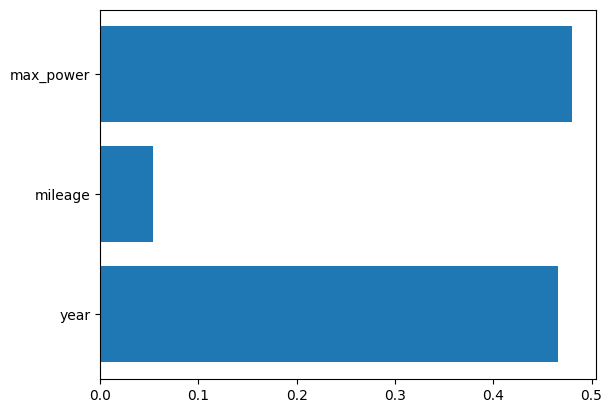

In [67]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

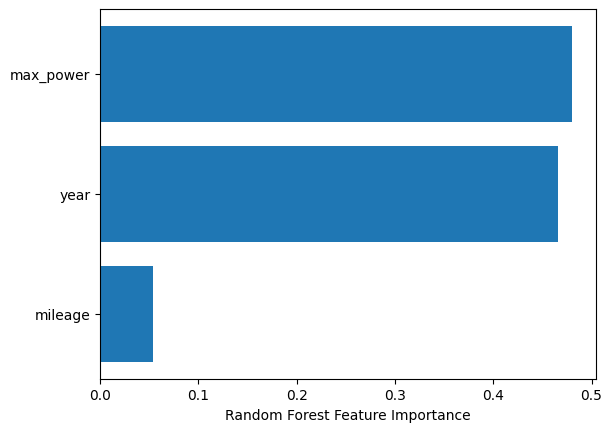

In [68]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

*Note*: The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

Text(0.5, 0, 'Random Forest Feature Importance')

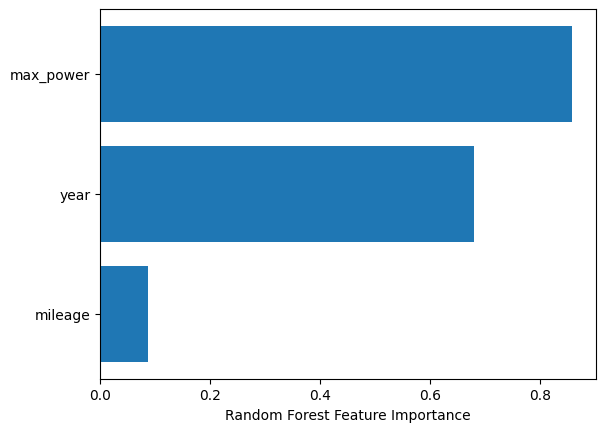

In [69]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction. It can be easily installed (<code>pip install shap</code>) 

In [70]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

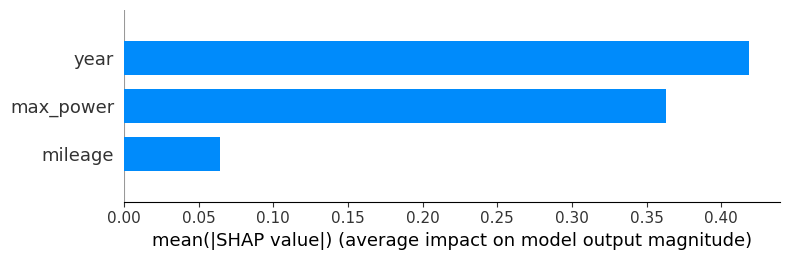

In [71]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [72]:
import pickle
model = {
    'model': grid,
    'scaler': scaler,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
}

# save the model to disk
filename = '../model/A1_car_selling_price.model'
pickle.dump(model, open(filename, 'wb'))

In [73]:
# Load the model from disk
loaded_file = pickle.load(open(filename, 'rb'))

In [74]:
loaded_model = loaded_file['model']
loaded_scaler = loaded_file['scaler']

In [75]:
print(type(loaded_model))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [76]:
df.head(90)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,1,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,20,2015,13.071070,78000,0,0,1,1,NaN,NaN,NaN,NaN
88,11,2012,12.577636,28000,1,0,1,1,19.81,1086.0,68.05,5.0
89,20,2017,12.542545,32000,1,0,1,1,14.00,796.0,35.00,5.0
91,30,2015,13.028053,42000,1,0,1,1,16.47,1198.0,74.00,5.0


In [77]:
#Test the model with simple input
df[['year','mileage','max_power','selling_price']].loc[1]

year             2014.000000
mileage            21.140000
max_power         103.520000
selling_price      12.821258
Name: 1, dtype: float64

In [78]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[1])

np.float64(370000.0000000001)

In [79]:
# Create array of sample data
#['year', 'mileage','max_power']
sample_np = np.array([[2014, 21.14, 103.52]])
sample = loaded_scaler.transform(sample_np)
sample

array([[0.04494691, 0.44338931, 0.34024827]])

In [80]:
# Predict the selling price and taking exponent to show the car selling price
predicted_price = loaded_model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([408080.28399897])

# Car Sellig Price Prediction Report
### Selected features

1. **'year'** : Indicates the car’s age and depreciation, directly affecting its value.
2. **'mileage'** : Reflects usage and wear; higher mileage often means lower prices.
3. **'max_power'** : Shows engine performance, with higher power typically leading to higher prices.

### Model selection
Based on the scores, Random Forest Regressor is the best choice, as it has the lowest mean error (-0.0550), indicating better prediction accuracy compared to the other models.

![Car Price](../Carprice.png)
